In [ ]:
# Step1:-  Input the required libraries
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam_v2
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils

In [ ]:
# 2a. Load the dataset after loading the dataset.
dataset = np.load('/content/ORL_faces.npz') 
xTrain = dataset['trainX']
xTest = dataset['testX']
yTrain= dataset['trainY']
yTest= dataset['testY']


In [ ]:
# 2b. You have to normalize every image

#normalize every image
xTrain = np.array(xTrain,dtype='float32')/255
xTest = np.array(xTest,dtype='float32')/255

# show the train and test Data format
print('xTrain : {}'.format(xTrain[:]))
print('yTrain shape: {}'.format(yTrain))
print('xTest shape: {}'.format(xTest.shape))

xTrain : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
yTrain shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 

In [ ]:
#3. Split the dataset
xTrain, xValid, yTrain, yValid= train_test_split(xTrain, yTrain, test_size=.05, random_state=1234,)

In [ ]:
#4. Transform the images to equal sizes to feed in CNN
imageRows=112
imageCols=92
batchSize=512
imageShape=(imageRows, imageCols, 1)

#change the size of images
xTrain = xTrain.reshape(xTrain.shape[0], *imageShape)
xTest = xTest.reshape(xTest.shape[0], *imageShape)
xValid = xValid.reshape(xValid.shape[0], *imageShape)

print('xTrain shape: {}'.format(yTrain.shape[0]))
print('xTest shape: {}'.format(yTest.shape))

xTrain shape: 228
xTest shape: (160,)


In [ ]:
# 5. Build a CNN model that has 3 main layers:
#   i. Convolutional Layer
#   ii. Pooling Layer
#   ii. Fully Connected Layer

cnnModel= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= imageShape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= imageShape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  
])

In [ ]:
cnnModel.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=adam_v2.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [ ]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [ ]:
# 6. Train the model
history=cnnModel.fit(
    np.array(xTrain), np.array(yTrain), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(xValid),np.array(yValid)),
)

Epoch 1/250
1/1 - 9s - loss: 3.0094 - accuracy: 0.0307 - val_loss: 3.0075 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 2/250
1/1 - 8s - loss: 2.9962 - accuracy: 0.0614 - val_loss: 3.0188 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 3/250
1/1 - 7s - loss: 2.9873 - accuracy: 0.0570 - val_loss: 3.0248 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 4/250
1/1 - 7s - loss: 2.9884 - accuracy: 0.0746 - val_loss: 3.0289 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 5/250
1/1 - 8s - loss: 2.9784 - accuracy: 0.0789 - val_loss: 3.0292 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 6/250
1/1 - 8s - loss: 2.9953 - accuracy: 0.0439 - val_loss: 3.0268 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 7/250
1/1 - 8s - loss: 2.9707 - accuracy: 0.0965 - val_loss: 3.0216 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 8/250
1/1 - 7s - loss: 3.0090 - accuracy: 0.0351 - val_loss: 3.0154 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 9/250
1/1 - 7s - l

In [ ]:
scor = cnnModel.evaluate( np.array(xTest),  np.array(yTest), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.3334
test acc 0.9500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


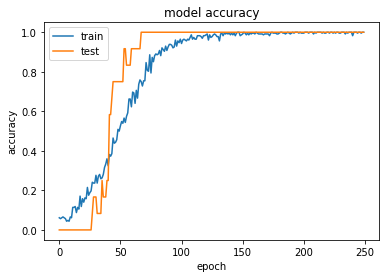

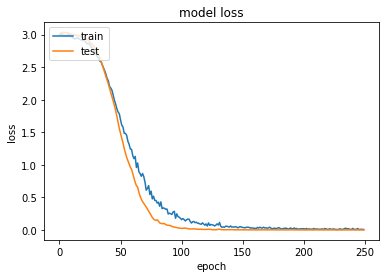

In [ ]:
#7. Plot the result
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#8. Iterate the model until the accuracy is above 90%
predicted = np.argmax( cnnModel.predict(xTest), axis=-1)

Acc=accuracy_score(yTest, predicted)
print("accuracy : ")
print(Acc)


accuracy : 
0.95


Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


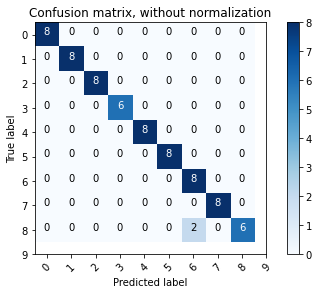

Confusion matrix, without normalization


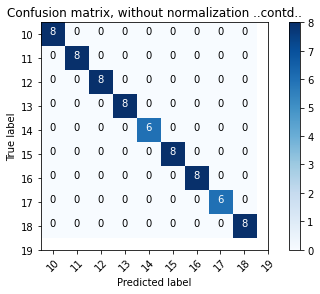

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [17]:
cnfMatrix=confusion_matrix(np.array(yTest), predicted)

yTest1 = np_utils.to_categorical(yTest, 20)

#This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Confusion matrix, without normalization')
print(cnfMatrix)

plt.figure()
plot_confusion_matrix(cnfMatrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnfMatrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization ..contd..')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(yTest), predicted))
print(classification_report(np.array(yTest), predicted))